<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/ai15-sc11x-%E1%84%8B%E1%85%B5%E1%84%89%E1%85%A1%E1%86%BC%E1%84%91%E1%85%B5%E1%86%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC11x**

# **Data Preprocessing & Exploratory Data Analysis**

## **Part 1. Data Wrangling**

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### **1-1. Load and Explore the Data**

#### **1-1-a. 각 데이터셋을 데이터프레임으로 불러와 변수 `df1`, `df2`, `df3`에 저장하세요.**

In [ ]:
#import
from IPython.display import display

import re
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


#pandas에서 DataFrame을 요약해서 표시하지 않도록 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 줄 구분 표시 출력 
def print_line() :
  print ("\n------------------------------------------------")
def print_line_m() :
  print ("\n-----------------------")
def print_line_s() :
  print ("\n----------")

df1 = pd.read_csv( "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv" , sep = "," , index_col = [0])
df2 = pd.read_csv( "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv" , sep = "," , index_col = [0])
df3 = pd.read_csv( "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv" , sep = "," , index_col = [0])


#### **1-1-b. 각 데이터프레임의 결측 데이터를 확인하세요.**

In [ ]:
# 결측치가 존재하는 컬럼명 조회
print( "# 컬럼별 결측치 갯수 ")
display( df1.isnull().sum() )
display( df2.isnull().sum() )
display( df3.isnull().sum() )



# 컬럼별 결측치 갯수 


geo                  0
time                 0
cell_phones_total    0
dtype: int64

geo           0
time          0
population    0
dtype: int64

geo        0
country    0
dtype: int64

#### **1-1-c. 각 데이터프레임의 중복 데이터를 확인하세요.**

In [ ]:
def check_dup ( df_target ):
  list_columns = df_target.columns

  int_rslt_dup_sum = 0
  for tmp_column in list_columns :
    # 중복값 갯수 조회
    tmp_dup_count = df_target[tmp_column].duplicated(keep = False).sum()
    int_rslt_dup_sum += tmp_dup_count
    if tmp_dup_count > 0 :
      print ( tmp_column , "컬럼에 중복값", tmp_dup_count , "개" )
  
  print ( "DataFrame의 총 중복값 갯수 ", int_rslt_dup_sum , "개" )

  return int_rslt_dup_sum


check_dup( df1 )
print_line()

check_dup( df2 )
print_line()

check_dup( df3 )
print_line()




geo 컬럼에 중복값 9573 개
time 컬럼에 중복값 9574 개
cell_phones_total 컬럼에 중복값 4683 개
DataFrame의 총 중복값 갯수  23830 개

------------------------------------------------
geo 컬럼에 중복값 35334 개
time 컬럼에 중복값 35334 개
population 컬럼에 중복값 721 개
DataFrame의 총 중복값 갯수  71389 개

------------------------------------------------
DataFrame의 총 중복값 갯수  0 개

------------------------------------------------


In [175]:
df1.duplicated().sum()

0

##### **Q1. 위에서 구한 데이터프레임의 결측 데이터의 수와 중복 데이터의 수를 각각 합한 값을 (`a`, `b`, `c`)의 형태로 쓰세요.**

- `a`에는 `df1` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.
- `b`에는 `df2` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.
- `c`에는 `df3` 데이터프레임의 결측 데이터 수와 중복 데이터 수를 합한 값이 들어갑니다.

In [176]:
print ( f"( {df1.isnull().sum().sum() + df1.duplicated().sum()} , {df2.isnull().sum().sum() + df2.duplicated().sum()} , {df3.isnull().sum().sum() + df3.duplicated().sum() } )"   )

( 0 , 0 , 0 )


#### **1-1-d. `df1`에서 `geo` column의 usa와 chn 데이터만 추출하여, `time` 값에 따른 `cell_phones_total` 값의 변화를 볼 수 있도록 scatter plot을 그리세요.**
- **Tip** : seaborn 라이브러리의 `.scatterplot()`을 사용하여 `hue` 파라미터를 설정할 수 있습니다. 

##### **Q2. Scatter plot에서 두 나라 중 2000년대 이후로 `cell_phones_total` 값이 더 급격하게 증가하는 나라의 `geo`를 쓰세요.**

,geo,time,cell_phones_total
1627,chn,1960,0.0
1628,chn,1965,0.0
1629,chn,1970,0.0


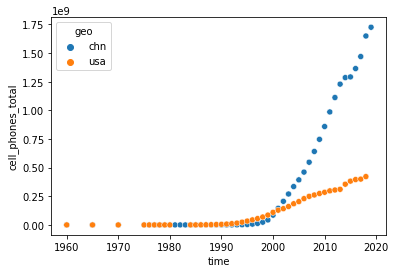

In [ ]:

df_temp = df1[ (df1['geo'] == 'usa' ) | ( df1['geo'] == 'chn') ]
display ( df_temp.head(3) )


sns.scatterplot(x=df_temp['time'], y=df_temp['cell_phones_total'] , hue=df_temp['geo'] )

### **1-2. Join Data**

세 데이터프레임을 합쳐, 하나의 데이터프레임으로 만들어봅니다.



- `df1`과 `df2`에 공통으로 존재하는 column들을 확인한 후, 해당 공통 column들의 교집합인 데이터를 기준으로 합쳐 새로운 데이터프레임을 만드세요. 
- 위에서 만든 데이터프레임과 `df3`를 공통 column의 교집합인 데이터를 기준으로 합쳐 새로운 데이터프레임을 변수 `df4`에 저장하세요.
  - `df4`는 다음과 같으며 shape은 (9568, 5)가 되어야 합니다.

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|

In [ ]:
# 테이블별 중복 column name 확인
all_columns = pd.Series(list(df1) + list(df2))
all_columns
all_columns.duplicated() # 중복여부 배열 
all_columns[all_columns.duplicated()]

3     geo
4    time
dtype: object

In [ ]:
display ( df1.head(2))
display ( df2.head(2))
display ( df3.head(2))

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0


,geo,time,population
0,abw,1950,38068
1,abw,1951,38267


,geo,country
0,abkh,Abkhazia
1,abw,Aruba


In [ ]:
df4 = df1.merge(df2, on=['geo' , 'time'] , how='inner').merge(df3, on='geo' , how='left')
df4.head(2)

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba


In [ ]:
df4.shape

(9568, 5)

##### **Q3. `df4`에서 `index==9500`에 해당하는 모든 값을 (`geo`, `time`, `cell_phones_total`, `population`, `country`) 형태로 쓰세요. (단, 숫자형 데이터는 모두 정수형으로 씁니다.)** <br>
> **ex)**
> `index == 0` 인 경우에는 다음과 같이 표기합니다 **(abw, 1960, 0, 54211, Aruba)**

In [ ]:
tmp_val = df4.iloc[9500]

print ( f"({tmp_val[0]},{tmp_val[1]},{tmp_val[2]},{tmp_val[3]},{tmp_val[4]})"  )

(zmb,2000,98853.0,10415944,Zambia)


### **1-3. Feature Engineering**

#### **1-3-a. 인구당 cell phone 수를 나타내는 데이터를 새로운 feature `PPP`에 저장하세요.**
```
(인구당 cell phone 수 (PPP)) = (cell phone 총 개수) / (인구)
```

In [ ]:
df4.head()

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211.0,Aruba
1,abw,1965,0.0,57360.0,Aruba
2,abw,1970,0.0,59063.0,Aruba
3,abw,1975,0.0,60657.0,Aruba
4,abw,1976,0.0,60586.0,Aruba


In [ ]:
#df4['PPP'] = df4['PPP'] = df4['cell_phones_total'] / df4['population']

df4['PPP'] = df4['cell_phones_total'] / df4['population']

In [ ]:
df4.sample(20)

,geo,time,cell_phones_total,population,country,PPP
1561,che,2002,5736303.0,7220377,Switzerland,0.794460
3647,gtm,2014,16911811.0,15923236,Guatemala,1.062084
7155,prt,1984,0.0,9921241,Portugal,0.000000
9362,wsm,2000,2500.0,174454,Samoa,0.014330
5703,mhl,1995,264.0,50457,Marshall Islands,0.005232
8405,tgo,2015,4855206.0,7323158,Togo,0.662993
1982,cpv,1996,0.0,395533,Cape Verde,0.000000
7660,sgp,2018,8568400.0,5757499,Singapore,1.488216
4992,lbr,2014,3225258.0,4359506,Liberia,0.739822
2943,fra,2017,69018000.0,64842509,France,1.064394


#### **1-3-b. 나라별 평균 PPP를 구하고, 평균 PPP 값이 높은 순서대로 데이터를 정렬하세요.**
- 결과는 데이터프레임 형태로 반환합니다. 
- 데이터 정렬 후 index를 재설정하세요. 

|country|PPP|
|:-:|:-:|
|Sint Maarten (Dutch part)|1.899506|
|Montenegro|1.574349|
|Curaçao|1.259227|
|Serbia|0.951586|
|Israel|0.840197|
|Macao, China|0.818130|
|...|...|

In [ ]:
df_temp = df4.copy()

df_ppp = df_temp.groupby( 'country' ).mean().sort_values(  'PPP', ascending = False)
df_ppp = df_ppp.reset_index()
df_ppp.head()

,country,time,cell_phones_total,population,PPP
0,Sint Maarten (Dutch part),2012.0,68840.000,3.624100e+04,1.899506
1,Montenegro,2011.5,983047.875,6.237021e+05,1.574349
2,Curaçao,2013.5,196289.500,1.562555e+05,1.259227
3,Serbia,2011.5,8525242.625,8.975920e+06,0.951586
4,Israel,2004.5,6042948.300,6.533353e+06,0.840197


##### **Q4. 위 과정을 모두 수행한 데이터프레임에서 `index==210`인 나라는 어디인가요?**

> **ex)** `index == 0` 인 나라는 **Sint Maarten (Dutch part)** 입니다.

In [ ]:
df_ppp.iloc[210]['country']

'Eritrea'

## **Part 2. Data Visualization**

이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.

아래 cell 을 실행하면 자동으로 data가 load 되며, `data_for_graph`라는 이름의 dataframe을 얻게 됩니다. 

(원하신다면 추가 시각화를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})

df['Month'] = df['date'].dt.month 
df = df.set_index('date')
df = df.sort_index()
# df.head()

data_for_graph = df.loc[datetime.date(2019, 1, 1):]
print(data_for_graph.shape)
data_for_graph.head()

(42, 3)


,biden_cable_multiple,biden_online_multiple,Month
date,,,
2019-01-06,0.431604,0.492401,1
2019-01-13,0.990476,0.360000,1
2019-01-20,0.423497,0.440758,1
2019-01-27,0.204420,0.274752,1
2019-02-03,0.276596,0.334471,2


#### **2-1. `data_for_graph`에서 각 column의 <u>월별 평균 값</u>을 Line graph로 그리세요.**
- `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 다른 색을 가져야 합니다. 
- 각 라인이 `Cable News`와 `Online News` 중 무엇을 나타내는지 범례를 표시합니다.
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


In [ ]:
df_src = data_for_graph.copy()

df_temp = df_src.groupby( 'Month' ).mean()
df_temp.head(10)

,biden_cable_multiple,biden_online_multiple
Month,,
1,0.512499,0.391978
2,0.345931,0.329717
3,1.736847,0.855717
4,1.997199,0.814604
5,3.054963,1.259382
6,2.815542,1.280751
7,1.906604,1.051410
8,1.849255,1.007523
9,3.208285,2.248763


Text(0.5, 1.0, "Biden's Ukraine-related media bump is fading")

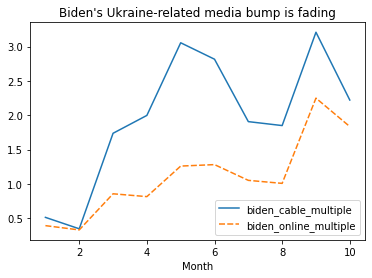

In [ ]:
sns.lineplot( data =df_temp ).set_title ( "Biden's Ukraine-related media bump is fading" )

##### **Q5. `Cable News`와 `Online News` 중 6월~8월 사이에 <u>월별 평균 값</u>이 더 높은것은 무엇인가요?**

In [ ]:
df_temp2 = df_temp.loc[6:8].reset_index()
display (df_temp2)

,Month,biden_cable_multiple,biden_online_multiple
0,6,2.815542,1.280751
1,7,1.906604,1.051410
2,8,1.849255,1.007523


In [ ]:
df_rslt = df_temp2.groupby('Month').mean()

케이블_평균 = df_temp2['biden_cable_multiple'].mean()
온라인_평균 = df_temp2['biden_online_multiple'].mean()

print( f"케이블_평균 = {케이블_평균} , 온라인_평균 = {온라인_평균} ")

케이블_평균 = 2.190467198392619 , 온라인_평균 = 1.1132280512524704 


## **Part 3. 도전 과제**
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다.  

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

### **3-1. Filtering**

#### **2017년은 중국에서 people(인구수)보다 cell phone 개수가 더 많아지는 첫 번째 해입니다. 미국의 경우, cell phone의 개수가 people보다 더 많아지는 첫 번째 해는 언제인지 구하세요.**
  - **Part1**의 `df4`로부터 답을 도출합니다. 


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9567
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geo                9568 non-null   object 
 1   time               9568 non-null   int64  
 2   cell_phones_total  9568 non-null   float64
 3   population         9568 non-null   int64  
 4   country            9568 non-null   object 
 5   PPP                9568 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 523.2+ KB


In [ ]:
df4_clean = df4.copy()

In [ ]:
df4.head(5)

,geo,time,cell_phones_total,population,country,PPP
0,abw,1960,0.0,54211,Aruba,0.0
1,abw,1965,0.0,57360,Aruba,0.0
2,abw,1970,0.0,59063,Aruba,0.0
3,abw,1975,0.0,60657,Aruba,0.0
4,abw,1976,0.0,60586,Aruba,0.0


In [ ]:
df4_clean['cell_phones_total'] = df4_clean['cell_phones_total'].astype(int)

In [ ]:
df4_clean.head(5)

,geo,time,cell_phones_total,population,country,PPP
0,abw,1960,0,54211,Aruba,0.0
1,abw,1965,0,57360,Aruba,0.0
2,abw,1970,0,59063,Aruba,0.0
3,abw,1975,0,60657,Aruba,0.0
4,abw,1976,0,60586,Aruba,0.0


In [ ]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9568 entries, 0 to 9567
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geo                9568 non-null   object 
 1   time               9568 non-null   int64  
 2   cell_phones_total  9568 non-null   int64  
 3   population         9568 non-null   int64  
 4   country            9568 non-null   object 
 5   PPP                9568 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 523.2+ KB


In [ ]:
df_chn = df4_clean[df4_clean['geo'] == 'usa' ]
df_chn_CellPhoneOver = df_chn[ df4['cell_phones_total'] > df4['population'] ]

df_chn_CellPhoneOver.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,geo,time,cell_phones_total,population,country,PPP
9033,usa,2014,355500000,318673411,United States,1.115562
9034,usa,2015,382307000,320878310,United States,1.191439
9035,usa,2016,396000000,323015995,United States,1.225945
9036,usa,2017,400000000,325084756,United States,1.230448
9037,usa,2018,422000000,327096265,United States,1.290140


In [ ]:
print( df_chn_CellPhoneOver.iloc[0]['time'] )

2014


### **3-2. Advanced Visualization**

**Part 2**에서 그린 그래프를 마케팅 부서에 전달하려고 합니다. 이때 다른 사람들이 그래프를 이해할 수 있도록 완성도를 높여야 합니다.

#### **다음 순서에 따라 시각화의 완성도를 높여 보세요.**

- 그래프의 스타일을 지정해 봅니다. 
  - `plt.style.available`이 어떤 메소드인지 찾아보고, 이를 실행했을 때 반환되는 결과들에 대해서 알아보세요. 
    - [Style Plots using Matplotlib](https://www.geeksforgeeks.org/style-plots-using-matplotlib/#:~:text=Matplotlib%20is%20the%20most%20popular,without%20using%20any%20other%20GUIs) 
    - [Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
  - 검색한 내용을 바탕으로 본인이 원하는 스타일로 지정해 봅니다. 
- **Part2** 에서 그린 그래프보다 크기가 커지도록 크기를 조정합니다. 
- **Part2** 에서 그린 그래프의 x축에는 짝수 월만 표시되어 있습니다. x축 단위를 지정하여 홀수 월도 모두 표시되도록 합니다. 
- x축과 y축에 각각 label(이름)을 붙여 봅니다. 
- title이 강조되도록 title의 크기를 키운 후 bold 처리해 줍니다. 
- 그래프가 나타내는 바를 이해할 수 있도록 다음 부제목을 추가하고, title보다 작은 크기로 설정합니다. "Biden's share of media mentions on each medium relative to the next most-mentioned candidate each week"
  - 가독성을 위해 문장 중간에 `\n`을 삽입할 수 있습니다. 
  - title과 부제목의 위치를 조정하여 서로 겹치지 않도록 합니다.  
- 각 라인이 `Cable News`와 `Online News` 중 무엇을 나타내는지 명시해 줍니다.

In [ ]:
df_temp.head(10)

,biden_cable_multiple,biden_online_multiple
Month,,
1,0.512499,0.391978
2,0.345931,0.329717
3,1.736847,0.855717
4,1.997199,0.814604
5,3.054963,1.259382
6,2.815542,1.280751
7,1.906604,1.051410
8,1.849255,1.007523
9,3.208285,2.248763


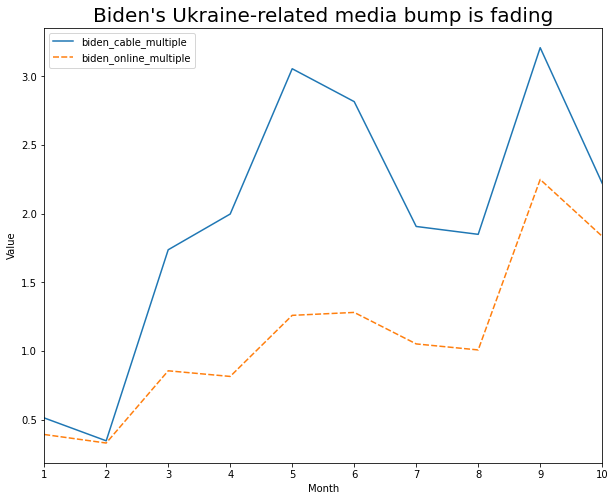

In [177]:
df_src = data_for_graph.copy()

df_temp = df_src.groupby( 'Month' ).mean()
df_temp.head(10)

## 그래프 셋팅

fig, ax = plt.subplots(figsize=(10, 8))
#sns.countplot(x=df_temp['pclass'].values, ax=ax)
plt.title("Biden's Ukraine-related media bump is fading", fontsize=20)
plt.xlim( 1, 10)
plt.xlabel('Month')
plt.ylabel('Value')
#plt.ticklabel_format( axis='x', scilimits=(1))
#plt.set_useOffset( 1)
sns.lineplot( data =df_temp )
plt.show()


